In [ ]:
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt
from ukbb_recessive.regression.regressions import read_results_excel
import ukbb_recessive.regression.plotting as plotting
from matplotlib.cm import get_cmap


sns.set_style("whitegrid")

# Add fonts
plotting.add_fonts(['../../../data/fonts'])
plotting.configure_matplotlib()

PLOTS_OUTPUT_DIR = '../../../data/plots'
tables_folder = '../../../data/tables'

# Prepare datasets

## Load PLP-based estimations

In [3]:
# Dictionary to rename target columns
renaming_dict_target = {
    'is_blond': 'Hair color', 
    'years_of_edu': 'Years of\neducation',
    'diagnosis_total_ICD10_cnt_log': 'Diagnoses\ncount (log)',
    'ICD_infertility': 'Infertility',
    'living_with_a_partner': 'Has partner',
    'fluid_intelligence_score': 'Fluid\nintelligence',
    'childlessness': 'Childlessness'
}

use_dataset = 'Roulette'

results_path = f"{tables_folder}/table_id_vs_rest_analysis.xlsx"

# load flat table
id_vs_rest = read_results_excel(results_path, flatten_multiindex=True)

# leave only necessary s_het effect
id_vs_rest = id_vs_rest[id_vs_rest['feature'].str.contains("s_het")]

# add odds ratio distance
id_vs_rest = plotting.add_odds_ratio_intervals(id_vs_rest)
id_vs_rest = plotting.add_effect_size_intervals(id_vs_rest)

# filter out dataset
id_vs_rest = id_vs_rest[id_vs_rest['dataset'] == 'Roulette']


# select targets of interest
id_vs_rest = id_vs_rest[id_vs_rest['target'].isin(renaming_dict_target.keys())].copy()
id_vs_rest['target'] = id_vs_rest['target'].apply(lambda x: renaming_dict_target.get(x, x))

# select gender of interest
id_vs_rest = id_vs_rest[id_vs_rest['gender'] == 'all']

# select analyses
renaming_dict_feature = {
    's_het_recessive_AR_without_ID': 'Other recessive genes',
	's_het_recessive_ID_total': 'Recessive ID genes',
}

id_vs_rest = id_vs_rest[id_vs_rest['feature'].isin(renaming_dict_feature.keys())].copy()


id_vs_rest.loc[:, 'analysis'] = id_vs_rest['feature'].apply(lambda x: renaming_dict_feature.get(x, x))


print("Target:", id_vs_rest['target'].unique())

id_vs_rest.head(3)

Target: ['Childlessness' 'Years of\neducation' 'Diagnoses\ncount (log)'
 'Fluid\nintelligence' 'Hair color']


dataset                        feature    effect  odds_ratio  \
3   Roulette  s_het_recessive_AR_without_ID  0.351723    1.421514   
11  Roulette  s_het_recessive_AR_without_ID -1.096313    0.334101   
19  Roulette  s_het_recessive_AR_without_ID  0.261079    1.298330   

    odds_ratio_lower  odds_ratio_upper odds_ratio_pretty          99.0% CI  \
3           0.866127          2.333033        OR = 1.422    [0.866, 2.333]   
11          0.124135          0.899206       ES = -1.096  [-2.086, -0.106]   
19          1.066865          1.580012        ES = 0.261    [0.065, 0.457]   

     p_value  p_value_corrected  ...  gender               analysis  \
3   0.067458           0.944414  ...     all  Other recessive genes   
11  0.004341           0.060778  ...     all  Other recessive genes   
19  0.000615           0.008610  ...     all  Other recessive genes   

                                              formula    family  \
3   childlessness ~ s_het_recessive_AR_without_ID ...  binomial   
11  years_of_edu ~ s_het_recessive_AR_without_ID +...  gaussian   
19  diagnosis_total_ICD10_cnt_log ~ s_het_recessiv...  gaussian   

   p_value_pretty p_value_corrected_pretty odds_ratio_lower_distance  \
3           0.067                    0.944                  0.555387   
11      4.34×10⁻³                    0.061                  0.209965   
19      6.15×10⁻⁴                8.61×10⁻³                  0.231464   

   odds_ratio_upper_distance effect_lower_distance  effect_upper_distance  
3                   0.911519              0.495446               0.495446  
11                  0.565106              0.990070               0.990070  
19                  0.281682              0.196354               0.196354  

[3 rows x 23 columns]

## Load synonymous-based estimations

In [4]:
results_path = f"{tables_folder}/sampling/synonymous/table_synonymous_id_vs_rest_analysis.xlsx"

# load flat table
synonymous = read_results_excel(results_path, flatten_multiindex=True)

# leave only necessary s_het effect
synonymous = synonymous[synonymous['feature'].str.contains("s_het")]

# add odds ratio distance
synonymous = plotting.add_odds_ratio_intervals(synonymous)
synonymous = plotting.add_effect_size_intervals(synonymous)

# select targets of interest
synonymous = synonymous[synonymous['target'].isin(renaming_dict_target.keys())].copy()
synonymous['target'] = synonymous['target'].apply(lambda x: renaming_dict_target.get(x, x))

# select gender of interest
synonymous = synonymous[synonymous['gender'] == 'all']

synonymous.head(3)

dataset                        feature    effect  odds_ratio  \
0  Roulette  s_het_recessive_AR_without_ID -0.019862    0.980334   
2  Roulette  s_het_recessive_AR_without_ID  0.011939    1.012010   
4  Roulette  s_het_recessive_AR_without_ID  0.030694    1.031170   

   odds_ratio_lower  odds_ratio_upper odds_ratio_pretty   p_value  \
0          0.748688          1.283652        OR = 0.980  0.849477   
2          0.598617          1.710884        ES = 0.012  0.953297   
4          0.929134          1.144412        ES = 0.031  0.447981   

   p_value_corrected  bonferroni_correction_coef  ...  gender  \
0          11.892676                          14  ...     all   
2          13.346163                          14  ...     all   
4           6.271735                          14  ...     all   

                                            analysis  \
0  synonymous_id_vs_rest regressions on [s_het_re...   
2  synonymous_id_vs_rest regressions on [s_het_re...   
4  synonymous_id_vs_rest regressions on [s_het_re...   

                                             formula    family p_value_pretty  \
0  childlessness ~ s_het_recessive_AR_without_ID ...  binomial          0.849   
2  years_of_edu ~ s_het_recessive_AR_without_ID +...  gaussian          0.953   
4  diagnosis_total_ICD10_cnt_log ~ s_het_recessiv...  gaussian          0.448   

  p_value_corrected_pretty odds_ratio_lower_distance  \
0                        1                  0.231646   
2                        1                  0.413393   
4                        1                  0.102036   

  odds_ratio_upper_distance  effect_lower_distance  effect_upper_distance  
0                  0.303318               0.269571               0.269571  
2                  0.698874               0.525072               0.525072  
4                  0.113242               0.104196               0.104196  

[3 rows x 22 columns]

# Plot

In [5]:
def plot_synonymous(ax, targets, synonymous, phenotypes, plot_entity='odds_ratio', vline_loc=1):

    # select necessary targets
    data_syns = synonymous[synonymous['target'].isin(targets)].copy()
    data_plps = phenotypes[phenotypes['target'].isin(targets)].copy()

    # sort dataset according to the target order
    data_syns.target = pd.Categorical(data_syns.target, categories=targets)
    data_syns = data_syns.sort_values('target')

    data_plps.target = pd.Categorical(data_plps.target, categories=targets)
    data_plps = data_plps.sort_values('target')

    # plot neutral line
    ax.vlines(x=vline_loc, ymin=-3, ymax=10, color='grey', linestyle='--', alpha=0.5, linewidth=0.5)
    
    vp = sns.violinplot(data=data_syns, y='target', x=plot_entity, hue='target',
                        ax=ax, linewidth=0.5, linecolor='k', palette=['#a0b4ff'])

    # plot PLPs estimation
    pp = sns.pointplot(data=data_plps, y='target', x=plot_entity, linestyle='none', markers='o', 
                       ax=ax, color='#ffa260', markersize=3, markeredgewidth=0.5, markeredgecolor='k')

/tmp/ipykernel_29019/1512117598.py:17: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  vp = sns.violinplot(data=data_syns, y='target', x=plot_entity, hue='target',
/tmp/ipykernel_29019/1512117598.py:17: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  vp = sns.violinplot(data=data_syns, y='target', x=plot_entity, hue='target',


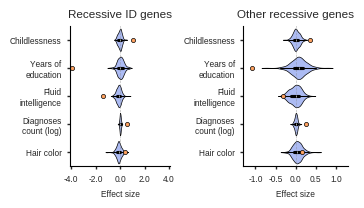

In [9]:
import matplotlib.ticker as ticker

cm = 1/2.54  # centimeters in inches
k = 1.
fig = plt.figure(constrained_layout=True, figsize=(8.8*cm*k, 5*cm*k))

# divide subfigure into left and right parts
subfigs = fig.subfigures(nrows=1, ncols=2, width_ratios=[1, 1], wspace=0.0)

targets = ['Childlessness', 'Years of\neducation', 'Fluid\nintelligence', 'Diagnoses\ncount (log)',  'Hair color']

# plot phenotypes results
ax_left = subfigs[0].subplots(1, 1)


plot_synonymous(ax_left, synonymous=synonymous[synonymous['feature'] == 's_het_recessive_ID_total'], 
                phenotypes=id_vs_rest[id_vs_rest['feature'] == 's_het_recessive_ID_total'], 
                targets=targets, plot_entity='effect', vline_loc=0)

ax_left.set_title('Recessive ID genes')
plotting.configure_axis(ax_left, x_label='Effect size', y_label=None, xlim=(-4.1, 4.1), ymargin=0.02, format_x=True)

ax_left.set_xticks([-4., -2., 0., 2., 4.])
ax_left.set_xticklabels([-4., -2., 0., 2., 4.])

# plot synonymous
ax_right = subfigs[1].subplots(1, 1)


plot_synonymous(ax_right, synonymous=synonymous[synonymous['feature'] == 's_het_recessive_AR_without_ID'], 
                phenotypes=id_vs_rest[id_vs_rest['feature'] == 's_het_recessive_AR_without_ID'], 
                targets=targets, plot_entity='effect', vline_loc=0)
ax_right.set_title('Other recessive genes')

ax_right.set_xticks([-1., -.5, 0., .5, 1.])
ax_right.set_xticklabels([-1., -.5, 0., .5, 1.])

plotting.configure_axis(ax_right, x_label='Effect size', y_label=None, xlim=(-1.3, 1.3), ymargin=0.02, format_x=True)

# save figure
plt.savefig(f"{PLOTS_OUTPUT_DIR}/figure_4.pdf", format="pdf", bbox_inches="tight")